## 1. Business Understanding
### 1.1 Overview

Real estate is a lucrative business in any economy due to various factors including the rate of population increase in most countries. Over the last decade, the housing market in the United States has seen every end of the housing spectrum. Real estate market trends peaked more than 10 years ago during the Great Recession. For the most of this year, competition propelled what appeared to be the hottest housing market prices in the industry's history. Buyers were forced to compete with many offers on each home, tipping the scales heavily in favor of sellers. Due to a supply and demand imbalance, homeowners were given an edge. It should be remembered, however, that the approaching prospect of a recession, along with the greatest inflation rate recorded in the US housing market in over four decades, has compelled the Federal Reserve to take extreme action. To battle inflation and slow the economy, the Fed has implemented a number of rate rises, the most significant of which would more than quadruple mortgage rates. 

From this understanding, the real estate market in The United States is complex and can easily confuse a new real estate company or even a customer looking to invest in this lucrative business. Understanding all the fundamentals can be a challenge that may lead to bad investments and substantial losses. This potential predicted growth of the industry, coupled with rising population rates in the US create a huge lucrative opportunity for real estate investors to make huge profits provided they manage risk and make the right investments.
Horizon Real Estate, which is a new company in real estate , is looking to penetrate the market and build residential houses in the United States. The company is looking to identify the top five locations in the United states that are suitable for residential houses and have a high return on the company’s investment. Through the data provided, we can understand the fluctuations in the real estate market and the locations suitable for any investment based on their return on investments.

### 1.2 Problem Statement
Real Estate can be a very risky business but can be lucrative when the risks are understood. The risks can be bad locations, the unpredictable nature of the market et cetera.  Horizon Limited is looking to invest in real estate in the United States and need us to identify the locations that are the best to invest in and forecast the nature of the market.

### 1.3 Business Objectives
* Identify zipcodes with the best return on investment
* Identify best short-term investment regions
* Identify the volatility of home values in different regions
* Establish a reliable customer base


### 1.4 Business Success Criteria
Buying properties in areas with good short term investment based on their risk on investments and establishing a reliable customer base in these regions. 

### 1.5 Specific Objectives
* To analyze the housing data over a period of time, i.e., between 1996 and 2018 using a time series analysis to predict five best locations to invest in based on their return of investment (ROI).
* To determine the seasonality of the real estate market that can assist investors when trying to understand the housing market in the United States.
* To determine factors that influence the value of homes and to what degree. 

### 1.6 Research Questions
* What are the five best locations for Horizon Real Estate Firm to invest in
* What is the influence of urbanization on home values over time
* What are the locations that have the highest volatility of house prices
* Can we accurately predict house prices over time using the time series models
* What factors affect the house prices in the United States

### 1.7 Research Success Criteria
For the success criteria we will use Mean Absolute Percentage Error (MAPE) to determine the efficiency of the model. We will be aiming for an MAPE as low as 0.05%. 



# 2. Data Understanding

The data used in this project is sampled from the real estate market of the United States, obtained from the [Zillow housing data](https://www.zillow.com/research/data/). The data contains the median house prices through 22 years, i.e., 1996-2018,  and the regions where the houses are located. The data also contains the city names and the metropolitan areas where these houses are located. The features of this data are fundamental to understanding the real estate market in the United States and draw insights that will assist us when advising Horizon Real Estate Firm. 
From the beginning of the project, we noted that the data is a little cumbersome to work with since it has 272 columns. This can provide efficient information on the real estate market but it will need to be melted for better analysis. This section will provide an understanding of the data cleaning process and the construction of workable dataset that can be used in our analysis and modeling



## 2.1 Data Description

##### Importing the necessary libaries

In [1]:
# For data manipulation 
import pandas as pd
# For data analysis
import numpy as np
#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')


##### Loading the dataset

In [2]:
data = pd.read_csv("zillow_data.csv")

##### Displaying First Rows

In [3]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


##### Displaying last five rows

In [4]:
data.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


The number of columns(272) in the last and first five rows is the same implying consistency in our dataset

In [5]:
# Checking the shape of dataset
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 14723
Number of columns: 272


The dataset has 14723 rows and 272 columns. 

In [6]:
# Checking for Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [7]:
# Checking Columns
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [8]:
# Description of the columns
columns = {'Columns': ['RegionID','RegionName','City','State','Metro','County Name','Size Rank','Date Columns (265 Columns)'],
'Description':['Unique region identifier','Names of the Regions (Zipcodes)','City names for the regions',
               'Names of the states','Names of metropolitan areas','Names of counties','Rank of Zipcodes by urbanization',
              'Median house prices across the years']}
pd.DataFrame(columns)

,Columns,Description
0,RegionID,Unique region identifier
1,RegionName,Names of the Regions (Zipcodes)
2,City,City names for the regions
3,State,Names of the states
4,Metro,Names of metropolitan areas
5,County Name,Names of counties
6,Size Rank,Rank of Zipcodes by urbanization
7,Date Columns (265 Columns),Median house prices across the years


In [9]:
# Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,14723.0,81075.010052,31934.118525,58196.0,67174.5,78007.0,90920.5,753844.0
RegionName,14723.0,48222.348706,29359.325439,1001.0,22101.5,46106.0,75205.5,99901.0
SizeRank,14723.0,7362.000000,4250.308342,1.0,3681.5,7362.0,11042.5,14723.0
1996-04,13684.0,118299.123063,86002.509608,11300.0,68800.0,99500.0,143200.0,3676700.0
1996-05,13684.0,118419.044139,86155.673905,11500.0,68900.0,99500.0,143300.0,3704200.0
...,...,...,...,...,...,...,...,...
2017-12,14723.0,281095.320247,367045.388033,14300.0,129900.0,193400.0,313400.0,18307100.0
2018-01,14723.0,282657.060382,369572.741938,14100.0,130600.0,194100.0,315100.0,18365900.0
2018-02,14723.0,284368.688447,371773.905107,13900.0,131050.0,195000.0,316850.0,18530400.0
2018-03,14723.0,286511.376757,372461.234695,13800.0,131950.0,196700.0,318850.0,18337700.0


## 2.2 Data Quality from the data description
* The dataset has 14723 rows and 272 columns. 
* The columns have both categorical(4) and numerical data(268)
* There are many columns because it is in a wide fromat; the last 265 columns describe the dates of the housing data. 
* We will need to melt down the dataset to enhance its usability



# 3. Data Preparation



Inorder to enhance the efficiency of our model, the data has to be inspected and cleaned to align with our objectives. 
This is to ensure that we do not generate any misleading information from the analysis. This includes Checking for the validity, consistency, completeness and uniformity. 

## 3.1 Data Cleaning

#### 3.1.1 Completeness

*  Checking and Handling for missing values


In [10]:
# Check for missing values 
print(f'The data has {data.isna().sum().sum()} missing values')

The data has 157934 missing values


In [11]:
print(f'The following columns contain these missing values {data.isna().sum().sort_values(ascending = False)}')

The following columns contain these missing values Metro      1043
1997-04    1039
1996-08    1039
1997-06    1039
1997-05    1039
           ... 
2015-09       0
2015-10       0
2015-11       0
2015-12       0
2018-04       0
Length: 272, dtype: int64


In [12]:
per_missing_vals = (data.isna().sum())*100/len(data)
per_missing_vals.sort_values(ascending=False)

Metro      7.084154
1997-04    7.056986
1996-08    7.056986
1997-06    7.056986
1997-05    7.056986
             ...   
2015-09    0.000000
2015-10    0.000000
2015-11    0.000000
2015-12    0.000000
2018-04    0.000000
Length: 272, dtype: float64

In [13]:
# Handling the missing values
## Fill the `metro` column with the word "missing"
data['Metro'].fillna('missing', inplace=True)

In [14]:
missing_values = data.isna().sum().sort_values(ascending=False)
percent = missing_values*100/len(data)
percent.sort_values(ascending=False)
percent

1997-04    7.056986
1996-08    7.056986
1997-06    7.056986
1997-05    7.056986
1997-03    7.056986
             ...   
2015-08    0.000000
2015-09    0.000000
2015-10    0.000000
2015-11    0.000000
2018-04    0.000000
Length: 272, dtype: float64

In [15]:
## Handling the date columns' missing values
data.interpolate(inplace=True)

In [16]:
#Check for the missing values again
data.isna().sum().value_counts()

0    272
Name: count, dtype: int64

#### 3.1.2 Validity
* Checking for duplicated values 
* Checking for Outliers in the dataset


In [17]:
# Checking for duplicated values  
data.duplicated().sum()


0

There are no duplicated values in the dataset

We  do not check for outliers in the data, as their presence helps improve the accuracy of the model since in real life there are houses that are priced highly above and below the average. 

#### 3.1.3 Uniformity
* Checking if the column names are uniform 
* Exploring the columns more
* Checking if the data types are relevant to the column description


In [18]:
# Cheking the column names again 
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [19]:
# Checking the data type of the RegionName column 
print(data.dtypes['RegionName'])
print(data.dtypes['SizeRank'])

int64
int64


In [20]:
# Renaming the RegionName column to Zipcode because the column's data is in numerical form
data.rename(columns = {'RegionName': "Zipcode"}, inplace=True)

In [21]:
# Changing the data type of the Zipcode column to categorical  
data.Zipcode = data.Zipcode.astype('string')
data.SizeRank = data.SizeRank.astype('string')

In [22]:
# Checking for the unique values in the Zipcode column
print("Number of Zip Codes: {}".format(data.Zipcode.nunique()))
print("Number of Size Rank: {}".format(data.SizeRank.nunique()))


Number of Zip Codes: 14723
Number of Size Rank: 14723


## 3.2 Data Construction

Here we will  derive new attributes from the data that will be helpful in answering our research questions.

In [23]:

# calculating and creating a new column -ROI
data['22yr_ROI'] = ((data['2018-04'] - data['1996-04'])/ data['1996-04'])
data['5yr_ROI'] = ((data['2018-04'] - data['2013-04'])/ data['2013-04'])

#calculating std to be used to find CV
data["std"] = data.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)
data['5yr_std'] = data.loc[:, "2013-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
data["mean"] = data.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)
data["5yr_mean"] = data.loc[:, "2013-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV
data["22yr_CV"] = data['std']/data["mean"]
data["5yr_CV"] = data['5yr_std']/data["5yr_mean"]

# dropping std and mean as they are not necessary for analysis
data.drop(["std", "mean", "5yr_std", "5yr_mean"], inplace=True, axis=1)

In [24]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

data.columns

Number of rows: 14723
Number of columns: 276


Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
       '22yr_ROI', '5yr_ROI', '22yr_CV', '5yr_CV'],
      dtype='object', length=276)

#### Convert data to Time Series

In [25]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_data = data.copy()

In [26]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank','22yr_ROI','22yr_CV','5yr_ROI','5yr_CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [34]:
# Loading the melted dataset
new_data = melt_df(new_data)

In [35]:
# First five rows of the melted dataset

new_data.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,Date,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,0.260827,0.066302,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,0.533842,0.124597,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,0.283158,0.072385,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,0.258788,0.056243,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,0.070485,0.023086,1996-04-01,77300.0


In [36]:
# Bottom five rows of the melted dataset

new_data.tail()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,Date,value
3901590,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,1.212474,0.232707,0.164719,0.058640,2018-04-01,209300.0
3901591,59107,3293,Woodstock,NH,Claremont,Grafton,14720,1.435814,0.303073,0.320468,0.065721,2018-04-01,225800.0
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,1.336252,0.182705,0.351570,0.085981,2018-04-01,133400.0
3901593,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,2.476714,0.282105,0.250753,0.096821,2018-04-01,664400.0
3901594,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,1.024943,0.310044,0.546990,0.107277,2018-04-01,357200.0


In [37]:
# Number of rows and columns
print('Number of rows:',new_data.shape[0])
print('Number of columns:',new_data.shape[1])

Number of rows: 3901595
Number of columns: 13


In [38]:
# Numerical Columns
print(f"Numerical Columns: {new_data.select_dtypes(include='int').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {new_data.select_dtypes(include='object').columns}")

Numerical Columns: Index(['RegionID'], dtype='object')

Categorical Columns: Index(['City', 'State', 'Metro', 'CountyName'], dtype='object')


In [39]:
# Summary Statistics
new_data.describe()

,RegionID,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,Date,value
count,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3901595,3.901595e+06
mean,8.107501e+04,1.308045e+00,2.373166e-01,3.347280e-01,8.890725e-02,2007-04-01 18:12:13.584906496,2.060636e+05
min,5.819600e+04,-8.509374e-01,4.127471e-02,-9.484705e-01,4.643504e-03,1996-04-01 00:00:00,1.130000e+04
25%,6.717400e+04,7.398374e-01,1.682299e-01,1.673081e-01,5.198128e-02,2001-10-01 00:00:00,9.770000e+04
50%,7.800700e+04,1.113095e+00,2.281251e-01,2.813668e-01,7.864871e-02,2007-04-01 00:00:00,1.469000e+05
75%,9.092100e+04,1.602582e+00,2.880063e-01,4.543509e-01,1.139259e-01,2012-10-01 00:00:00,2.354000e+05
max,7.538440e+05,1.019626e+02,1.303920e+00,8.183323e+00,1.432861e+00,2018-04-01 00:00:00,1.931490e+07
std,3.193304e+04,1.490562e+00,9.595088e-02,2.658193e-01,5.661946e-02,NaN,2.368017e+05


##### Data Indexing 
While working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of DatetimeIndex type.

In [40]:
## Making the date column into the index
new_data.set_index('Date',inplace = True)

In [41]:
# Checking to confirm if the index column of our new dataframe is Date column 
if isinstance(new_data.index, pd.DatetimeIndex):
    new_data.index.name == 'Date'
    print("Index column is date!")
else:
    print('Index column is not Date')

Index column is date!


In [42]:
# Inspecting Index column 
new_data.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=3901595, freq=None)

The output above shows that our dataset clearly fulfills the indexing requirements. Look at the last line:

dtype='datetime64[ns]',... length=3901595,...'

dtype=datetime[ns] field confirms that the index is made of timestamp objects.
length=3901595 shows the total number of entries in our time series data.


# 4. Exploratory Data Analysis

 Exploration will be done on the data to determine:

- Does Urbanization Affect Median House Prices?

- Which cities fetch the highest median house prices?

- What top 5 Zipcodes have the highest ROI?

- Which zipcodes have high price volatility?

## 4.1 Univariate Analysis
#### Feature `value`

In [47]:
# Summary statistic of home values
new_data.value.describe().T

count    3.901595e+06
mean     2.060636e+05
std      2.368017e+05
min      1.130000e+04
25%      9.770000e+04
50%      1.469000e+05
75%      2.354000e+05
max      1.931490e+07
Name: value, dtype: float64

Text(0.5, 0.98, 'The distribution of Home Values')

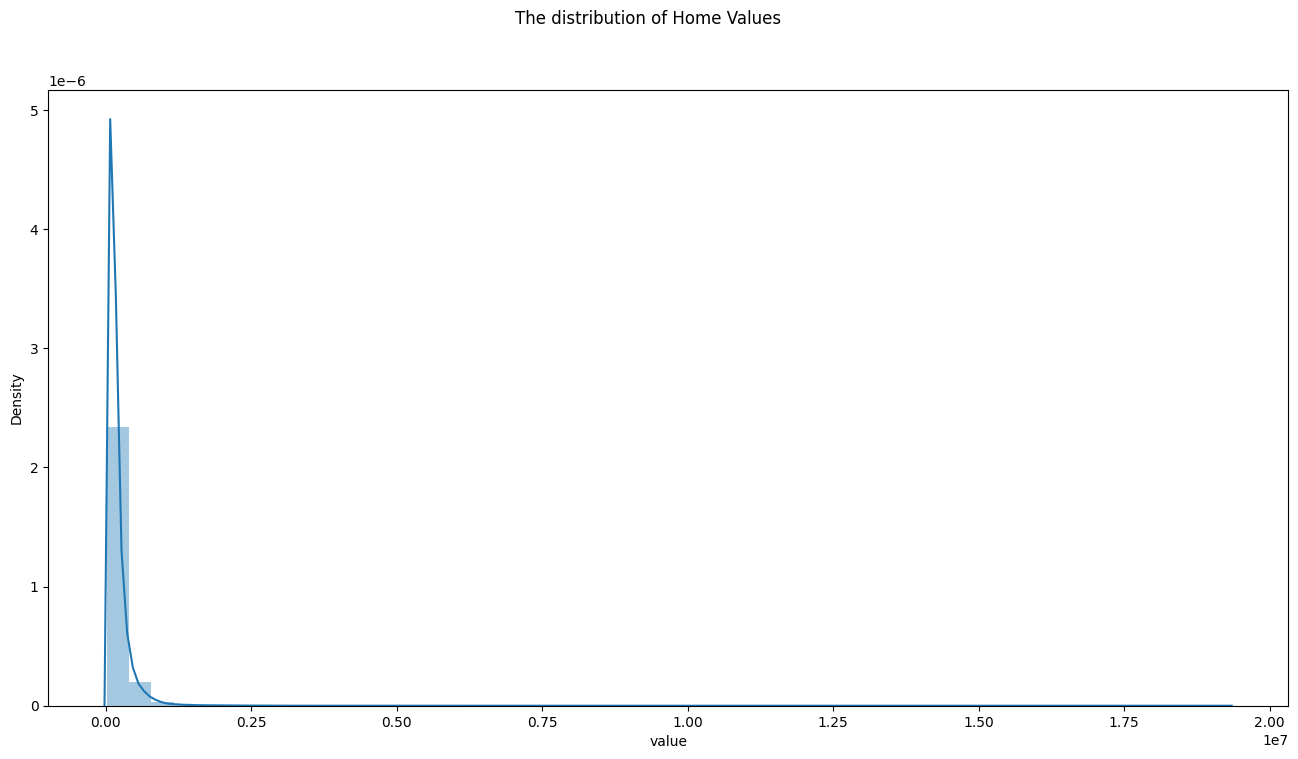

In [48]:
# The distribution of home values
plt.figure(figsize=(16,8))
sns.distplot(new_data.value, kde=True)
plt.suptitle("The distribution of Home Values")

The `value` columns has a long tail indicating the presence of outliers.These outliers will help us draw insights on the highly priced houses

#### Feature `22yr_ROI`

In [49]:
#Summary statistic of 22yr ROI
new_data['22yr_ROI'].describe().T

count    3.901595e+06
mean     1.308045e+00
std      1.490562e+00
min     -8.509374e-01
25%      7.398374e-01
50%      1.113095e+00
75%      1.602582e+00
max      1.019626e+02
Name: 22yr_ROI, dtype: float64

Text(0.5, 0.98, 'The distribution of ROI')

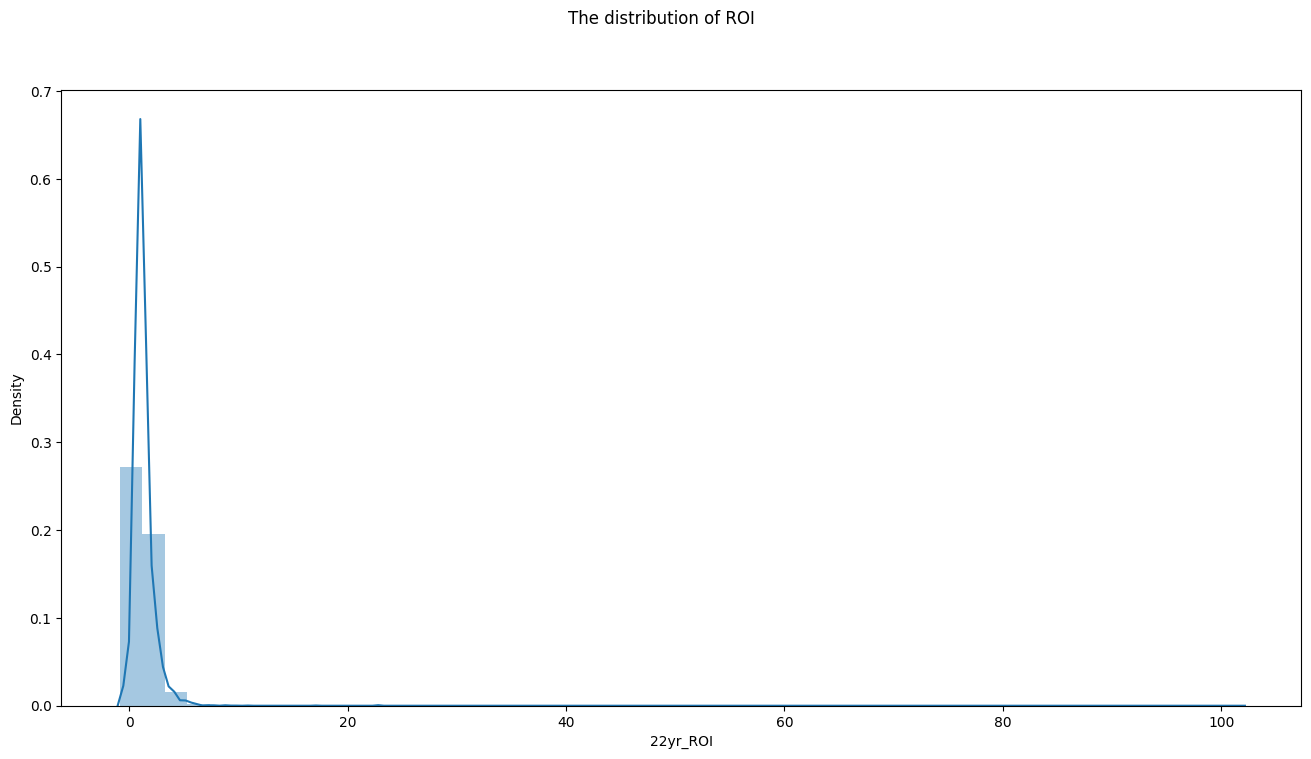

In [50]:
# The distribution of 22yr_ROI
plt.figure(figsize=(16,8))
sns.distplot(new_data['22yr_ROI'], kde=True)
plt.suptitle("The distribution of ROI")

It can be seen that majority of the 22yr return on investment are from 0 to 5% with presence of outliers with some homes having a very high or very low return on investment

#### Feature `5yr_ROI`

In [51]:
# Summary statistic of 5yr_ROI
new_data['5yr_ROI'].describe().T

count    3.901595e+06
mean     3.347280e-01
std      2.658193e-01
min     -9.484705e-01
25%      1.673081e-01
50%      2.813668e-01
75%      4.543509e-01
max      8.183323e+00
Name: 5yr_ROI, dtype: float64

Text(0.5, 0.98, 'The distribution of 5yr ROI')

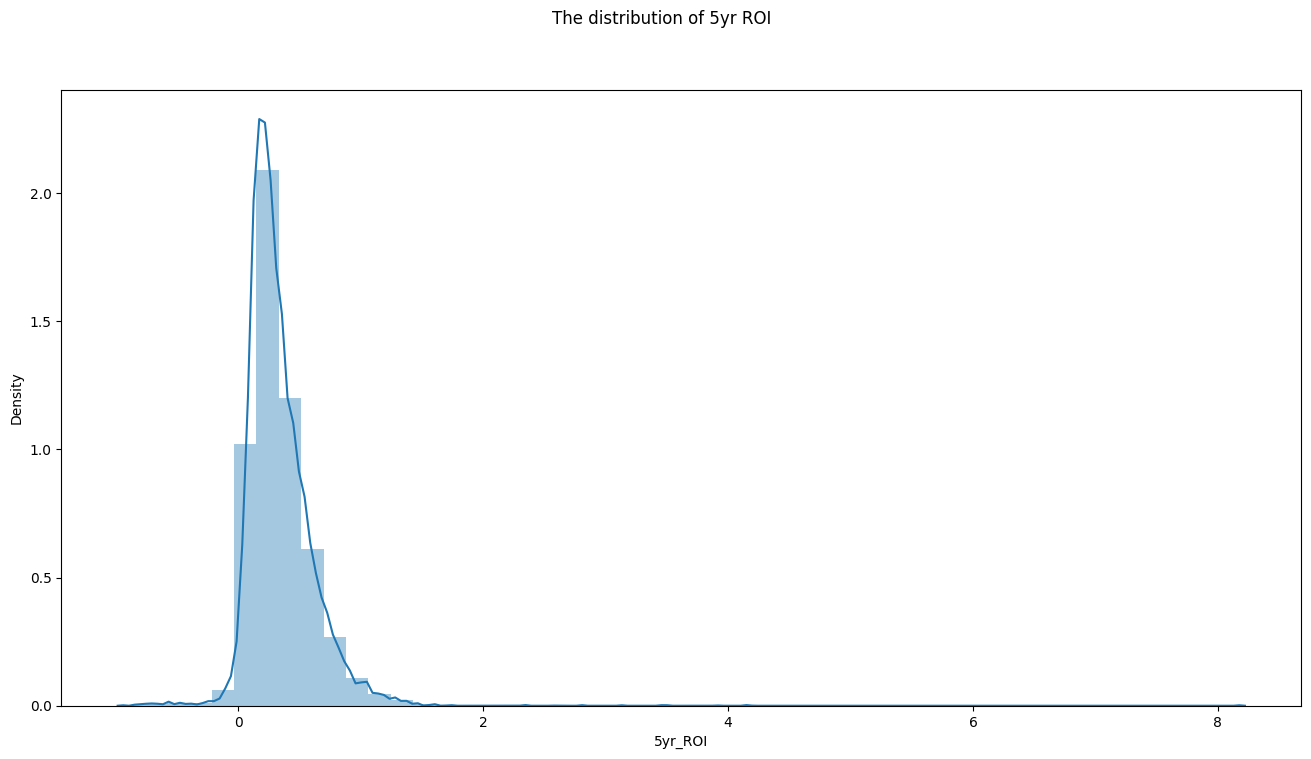

In [52]:
# The distribution of 5yr_ROI
plt.figure(figsize=(16,8))
sns.distplot(new_data['5yr_ROI'], kde=True)
plt.suptitle("The distribution of 5yr ROI")

#### Feature `22yr_CV`

In [53]:
# Summary statistics of 22yr_CV
new_data['22yr_CV'].describe().T

count    3.901595e+06
mean     2.373166e-01
std      9.595088e-02
min      4.127471e-02
25%      1.682299e-01
50%      2.281251e-01
75%      2.880063e-01
max      1.303920e+00
Name: 22yr_CV, dtype: float64

Text(0.5, 0.98, 'The distribution of 22yr CV')

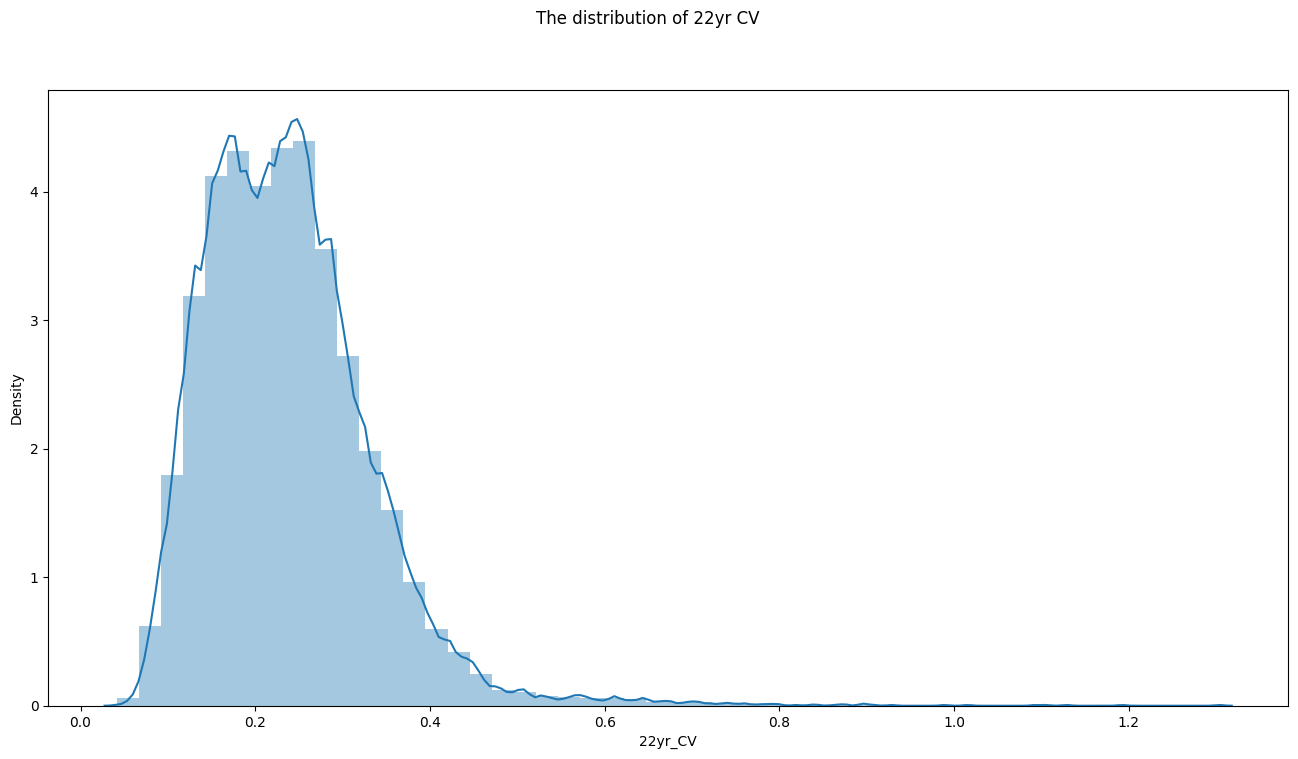

In [54]:
# The distribution of 22yr CV
plt.figure(figsize=(16,8))
sns.distplot(new_data['22yr_CV'], kde=True)
plt.suptitle("The distribution of 22yr CV")

The distribution of the 22 yr CV has a slight skewness with majority of the coefficient values being between 0.1 and 0.4

#### Feature `5yr_CV`

In [55]:
# Summary statistic of 5yr CV
new_data['5yr_CV'].describe().T

count    3.901595e+06
mean     8.890725e-02
std      5.661946e-02
min      4.643504e-03
25%      5.198128e-02
50%      7.864871e-02
75%      1.139259e-01
max      1.432861e+00
Name: 5yr_CV, dtype: float64

Text(0.5, 0.98, 'The distribution of 5yr CV')

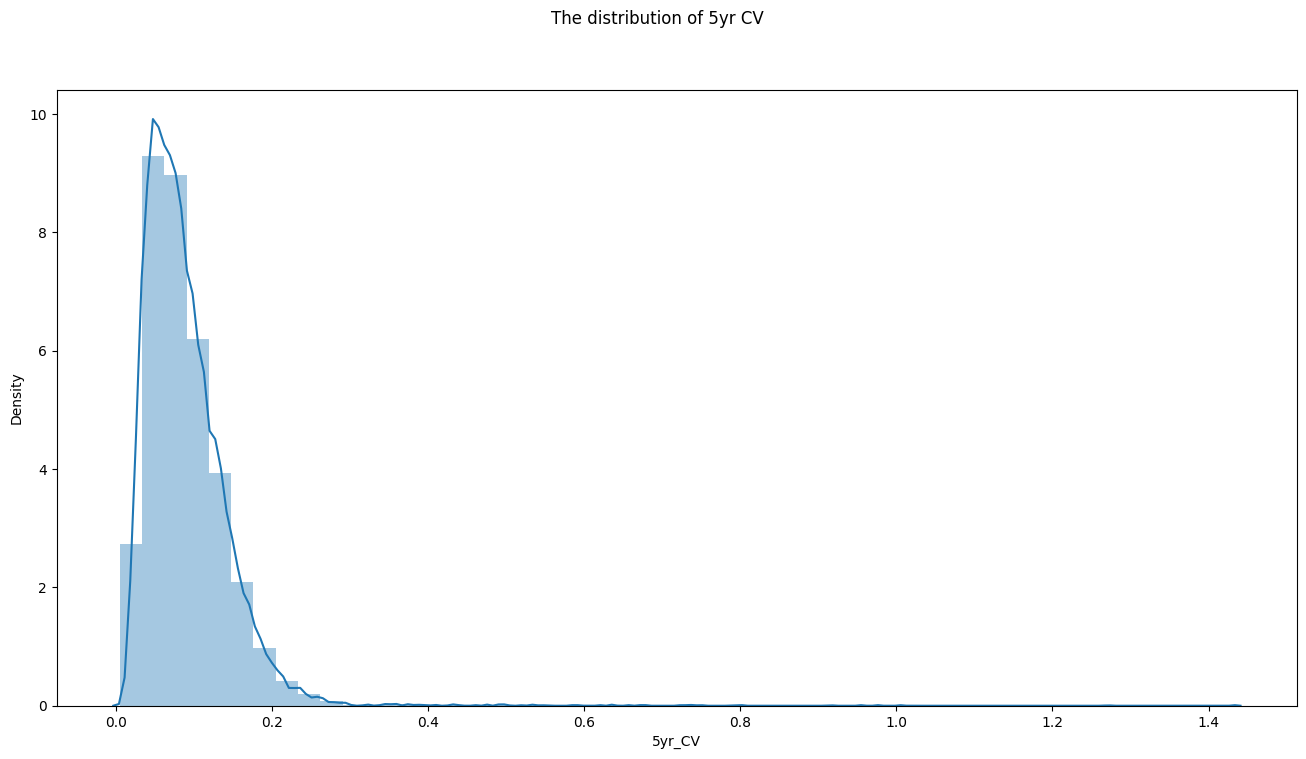

In [56]:
# The distribution of amount_tsh
plt.figure(figsize=(16,8))
sns.distplot(new_data['5yr_CV'], kde=True)
plt.suptitle("The distribution of 5yr CV")

#### Feature `Zipcode`

In [57]:
print(f"There are {new_data.Zipcode.nunique()} unique values of Zipcode")

There are 14723 unique values of Zipcode


In [58]:
# creating a function that returns a dictionary of value counts
def info_dict(data, col):
    """A function that zips the values and value_counts of string objects
    and returns the top 20"""
    name = list(data[col].value_counts().index[:20])
    val = list(data[col].value_counts().values[:20])
    info = dict(zip(name, val))
    return info

In [59]:
print("The 20 zipcodes with the most records:")
print("name: ,  number of records:")
info_dict(new_data, 'Zipcode')

The 20 zipcodes with the most records:
name: ,  number of records:


{'60657': 265,
 '30349': 265,
 '94565': 265,
 '77494': 265,
 '60614': 265,
 '79936': 265,
 '77084': 265,
 '10467': 265,
 '60640': 265,
 '77449': 265,
 '94109': 265,
 '11226': 265,
 '32162': 265,
 '11375': 265,
 '11235': 265,
 '37013': 265,
 '90250': 265,
 '60647': 265,
 '37211': 265,
 '78660': 265}

#### Feature `SizeRank`

In [60]:
print(f"There are {new_data.SizeRank.nunique()} unique values of Size Rank")

There are 14723 unique values of Size Rank


In [61]:
print("The 20 Size ranks with the most records:")
print("name: ,  number of records:")
info_dict(new_data, 'SizeRank')

The 20 Size ranks with the most records:
name: ,  number of records:


{'1': 265,
 '29': 265,
 '28': 265,
 '3': 265,
 '4': 265,
 '5': 265,
 '6': 265,
 '7': 265,
 '8': 265,
 '9': 265,
 '10': 265,
 '11': 265,
 '12': 265,
 '13': 265,
 '14': 265,
 '15': 265,
 '16': 265,
 '17': 265,
 '18': 265,
 '19': 265}

#### Feature `City`

In [62]:
print(f"There are {new_data.City.nunique()} unique values of City")

There are 7554 unique values of City


In [63]:
print("The 20 city with the most records:")
print("name: ,  number of records:")
info_dict(new_data, 'City')

The 20 city with the most records:
name: ,  number of records:


{'New York': 30210,
 'Los Angeles': 25175,
 'Houston': 23320,
 'San Antonio': 12720,
 'Washington': 11925,
 'Chicago': 10865,
 'Springfield': 10600,
 'Austin': 10600,
 'Las Vegas': 10070,
 'Philadelphia': 10070,
 'Columbus': 10070,
 'Kansas City': 9805,
 'Phoenix': 9805,
 'Dallas': 9275,
 'Portland': 9010,
 'San Diego': 8745,
 'Louisville': 8480,
 'Omaha': 7950,
 'Oklahoma City': 7950,
 'Denver': 7950}

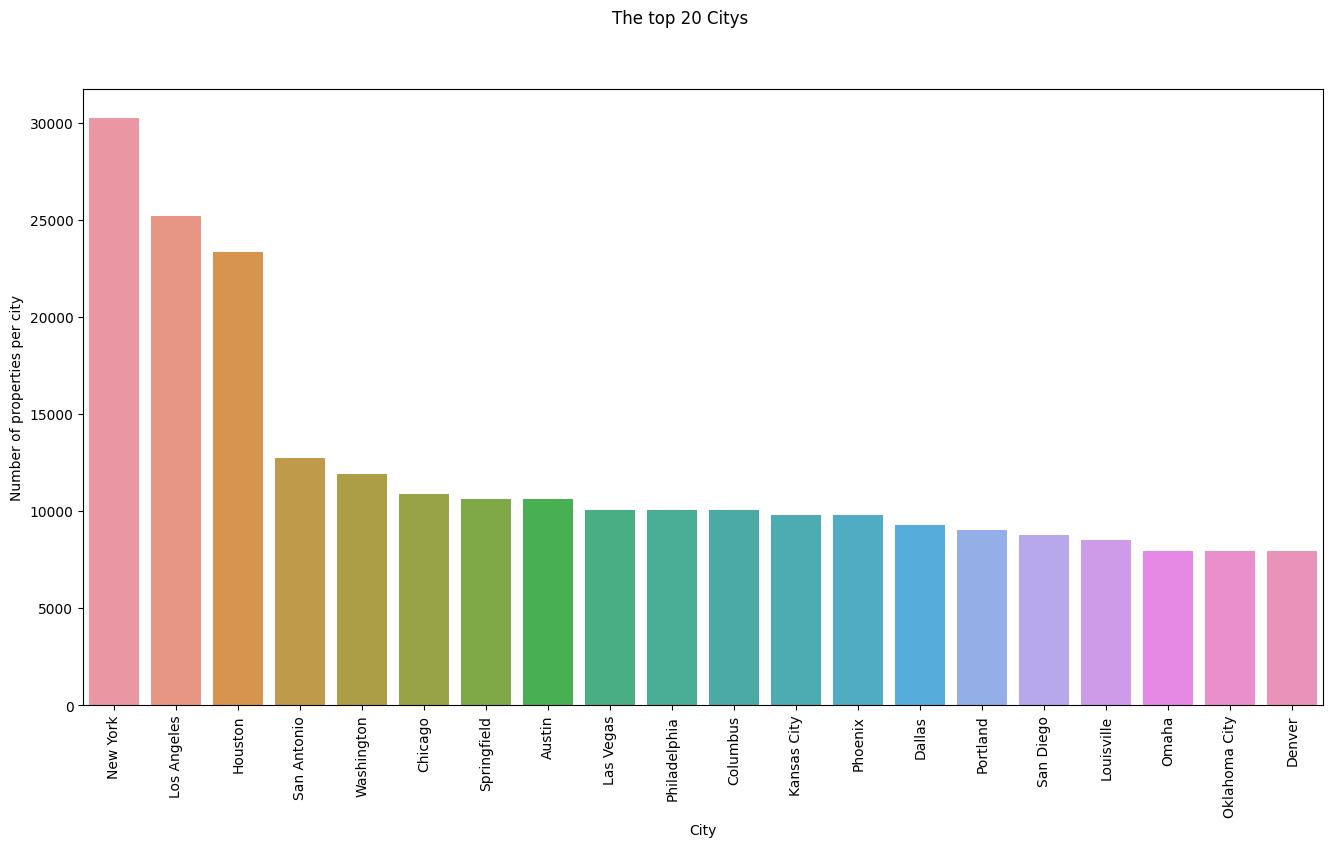

In [64]:
# plotting the top 20 Citys:
plt.figure(figsize=(16,8))

sns.barplot(x = new_data['City'].value_counts().index[:20], y = new_data['City'].value_counts().values[:20])
plt.suptitle("The top 20 Citys ")
plt.ylabel("Number of properties per city")
plt.xlabel("City")
plt.xticks(rotation=90)
plt.show()

#### Feature `State`

In [65]:
print(f"There are {new_data.State.nunique()} unique values of state")

There are 51 unique values of state


In [66]:
print("The 20 States with the most records:")
print("name: ,  number of records:")
info_dict(new_data, 'State')

The 20 States with the most records:
name: ,  number of records:


{'CA': 324360,
 'NY': 268975,
 'TX': 262085,
 'PA': 220215,
 'FL': 208025,
 'OH': 155820,
 'IL': 144955,
 'NJ': 133030,
 'MI': 132235,
 'IN': 113420,
 'NC': 113420,
 'MA': 110505,
 'TN': 107060,
 'VA': 106265,
 'MN': 99375,
 'GA': 91425,
 'WA': 90365,
 'WI': 87980,
 'MO': 84535,
 'MD': 84005}

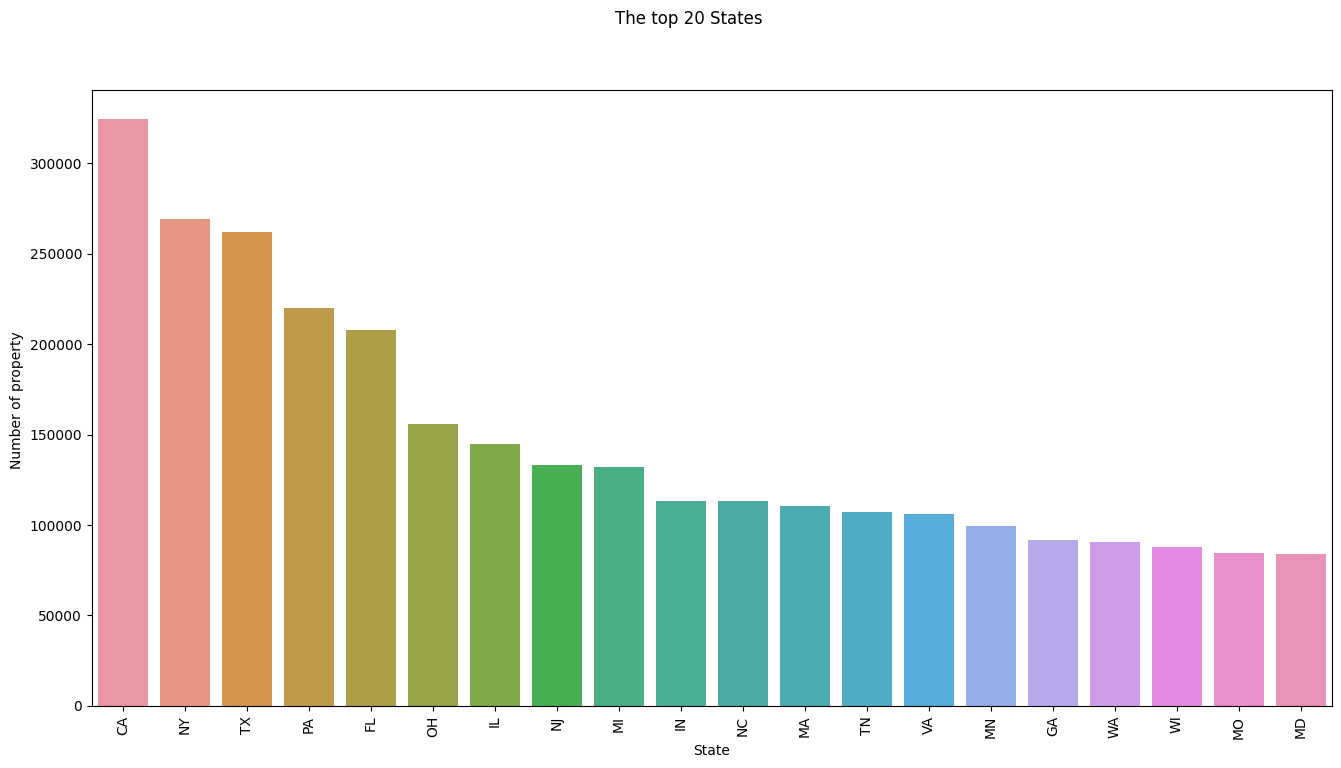

In [67]:
# plotting the top 20 States:
plt.figure(figsize=(16,8))
sns.barplot(x = new_data['State'].value_counts().index[:20], y = new_data['State'].value_counts().values[:20])
plt.suptitle("The top 20 States ")
plt.ylabel("Number of property ")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.show()

#### Feature `Metro`

In [68]:
print(f"There are {new_data.Metro.nunique()} unique values of Metro")

There are 702 unique values of Metro


In [69]:
print("The 20 Metro with the most records:")
print("name: ,  number of records:")
info_dict(new_data, 'Metro')

The 20 Metro with the most records:
name: ,  number of records:


{'missing': 276395,
 'New York': 206435,
 'Los Angeles-Long Beach-Anaheim': 91955,
 'Chicago': 86125,
 'Philadelphia': 74465,
 'Washington': 65985,
 'Boston': 65190,
 'Dallas-Fort Worth': 57505,
 'Minneapolis-St Paul': 53265,
 'Houston': 49555,
 'Pittsburgh': 46905,
 'Miami-Fort Lauderdale': 42930,
 'Portland': 42665,
 'Detroit': 40545,
 'Atlanta': 40280,
 'Seattle': 37365,
 'St. Louis': 37100,
 'San Francisco': 35510,
 'Kansas City': 33655,
 'Phoenix': 33390}

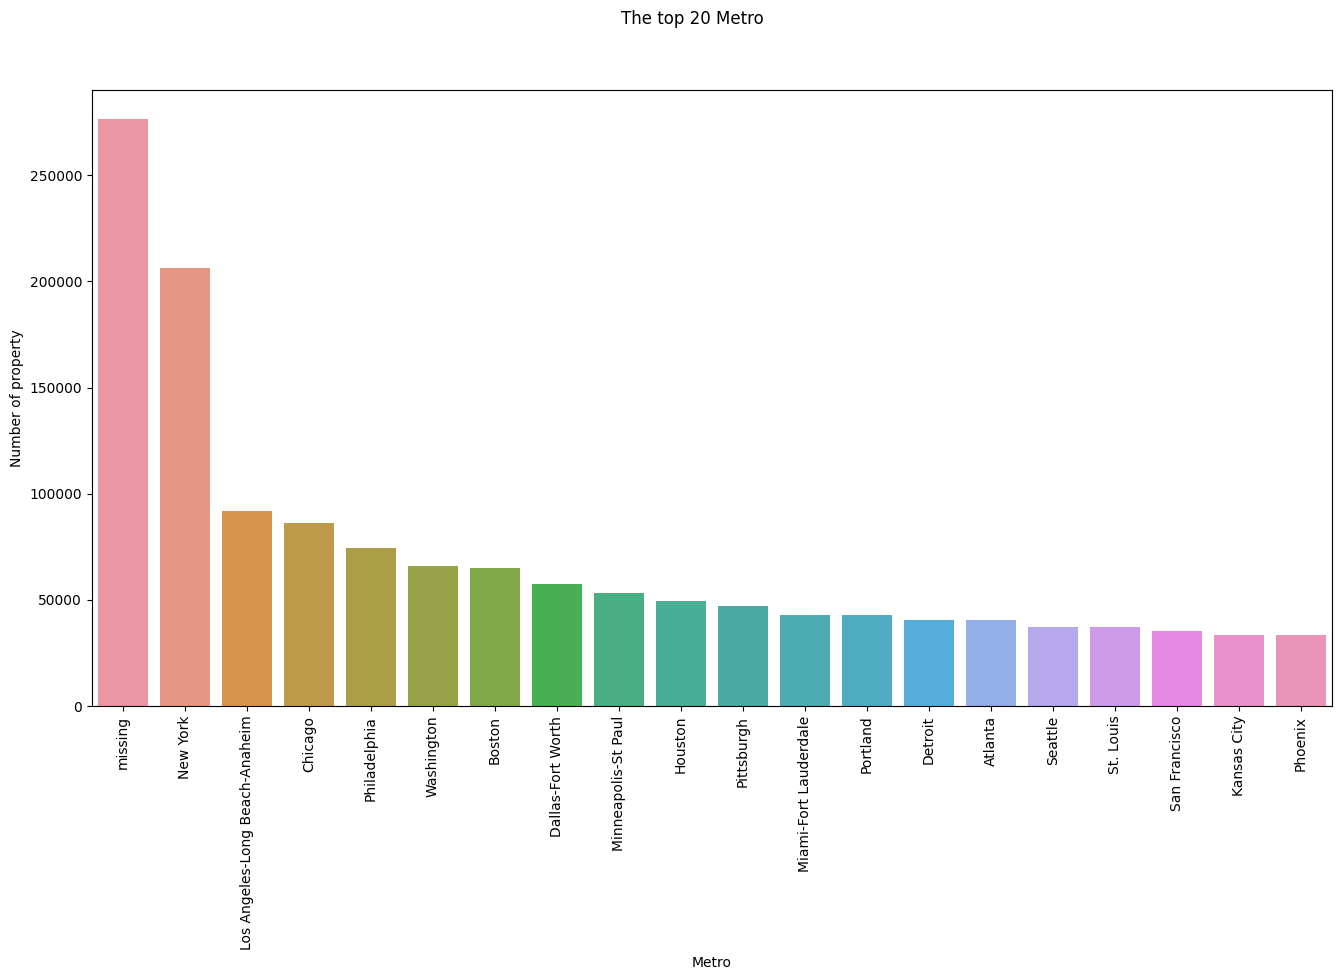

In [70]:
# plotting the top 20 Zipcodes:
plt.figure(figsize=(16,8))
sns.barplot(x = new_data['Metro'].value_counts().index[:20], y = new_data['Metro'].value_counts().values[:20])
plt.suptitle("The top 20 Metro")
plt.ylabel("Number of property")
plt.xlabel("Metro")
plt.xticks(rotation=90)
plt.show()

#### Feature `CountyName`

In [71]:
print(f"There are {new_data.CountyName.nunique()} unique values of County Name")

There are 1212 unique values of County Name


In [72]:
print("The 20 county name with the most records:")
print("name: ,  number of records:")
info_dict(new_data, 'CountyName')

The 20 county name with the most records:
name: ,  number of records:


{'Los Angeles': 69960,
 'Jefferson': 46375,
 'Orange': 43990,
 'Washington': 43460,
 'Montgomery': 42135,
 'Cook': 37100,
 'Harris': 33655,
 'Jackson': 31270,
 'Middlesex': 31005,
 'Maricopa': 29415,
 'Franklin': 29150,
 'Suffolk': 29150,
 'Clark': 24910,
 'Marion': 24380,
 'Monroe': 23850,
 'San Diego': 23055,
 'Madison': 22525,
 'Douglas': 21995,
 'Lake': 20935,
 'Dallas': 20405}

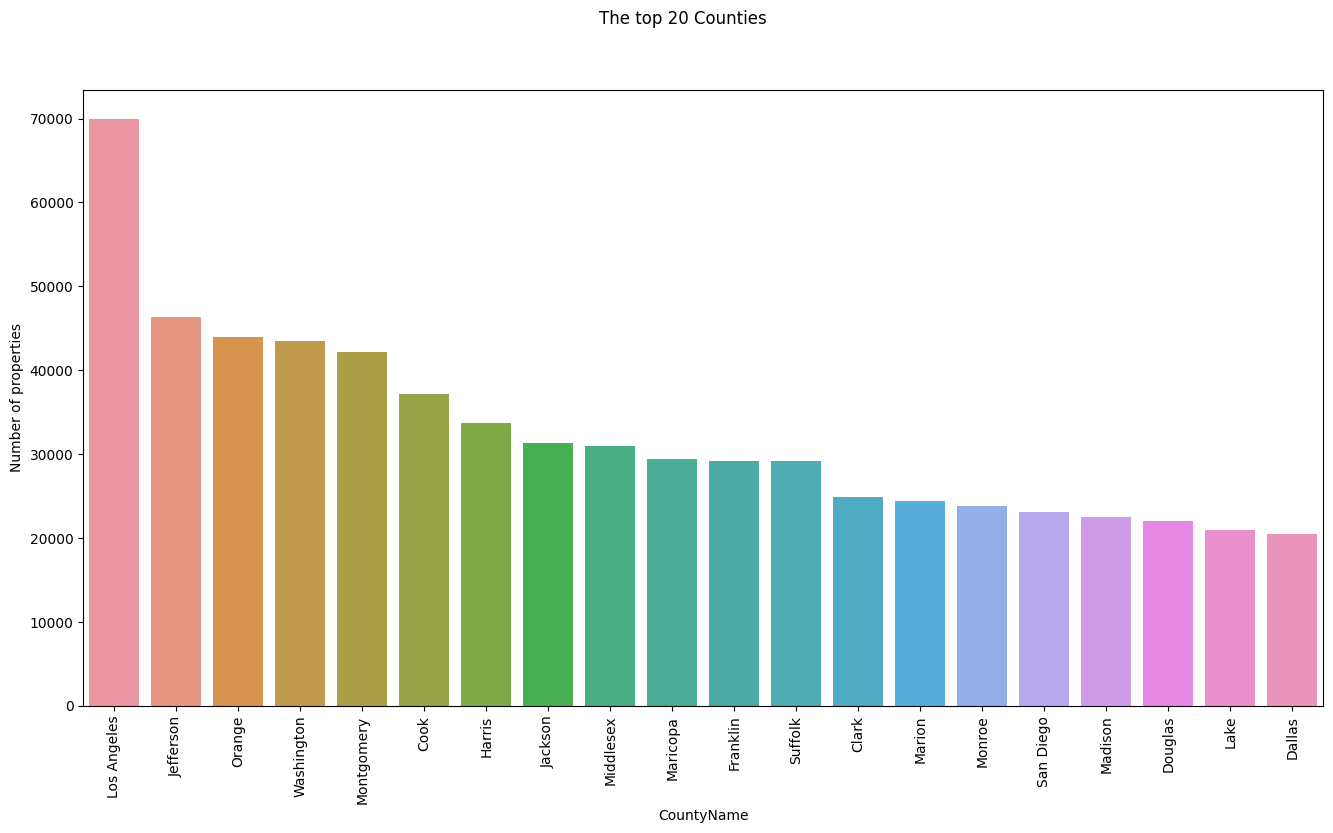

In [73]:
# plotting the top 20 CountyNames:
plt.figure(figsize=(16,8))
sns.barplot(x = new_data['CountyName'].value_counts().index[:20], y = new_data['CountyName'].value_counts().values[:20])
plt.suptitle("The top 20 Counties")
plt.ylabel("Number of properties")
plt.xlabel("CountyName")
plt.xticks(rotation=90)
plt.show()

## 4.2 Multivariate

Our aim here is to look for the relationship between different features

First we look at the correlation of the numeric columns using Pearson's coefficient


In [77]:
# Pearson coefficient of numeric columns
new_data.corr(numeric_only=True)

,RegionID,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,value
RegionID,1.000000,0.023343,0.042102,0.153243,0.128579,0.024458
22yr_ROI,0.023343,1.000000,0.415642,0.311660,0.174248,0.465619
22yr_CV,0.042102,0.415642,1.000000,0.365788,0.350312,0.305319
5yr_ROI,0.153243,0.311660,0.365788,1.000000,0.580770,0.113956
5yr_CV,0.128579,0.174248,0.350312,0.580770,1.000000,0.060882
value,0.024458,0.465619,0.305319,0.113956,0.060882,1.000000


* The factor with the strongest positive correlation to home values is 22yr ROI and vice versa which shows its importance when advising our clients
* The factor with the strongest positive correlation to home 5yr ROI  is 5yr CV and vice versa
* The factor with the strongest positive correlation to 22yr CV is 22yr ROI

Text(0.5, 0.98, 'Home value Vs 22yr ROI')

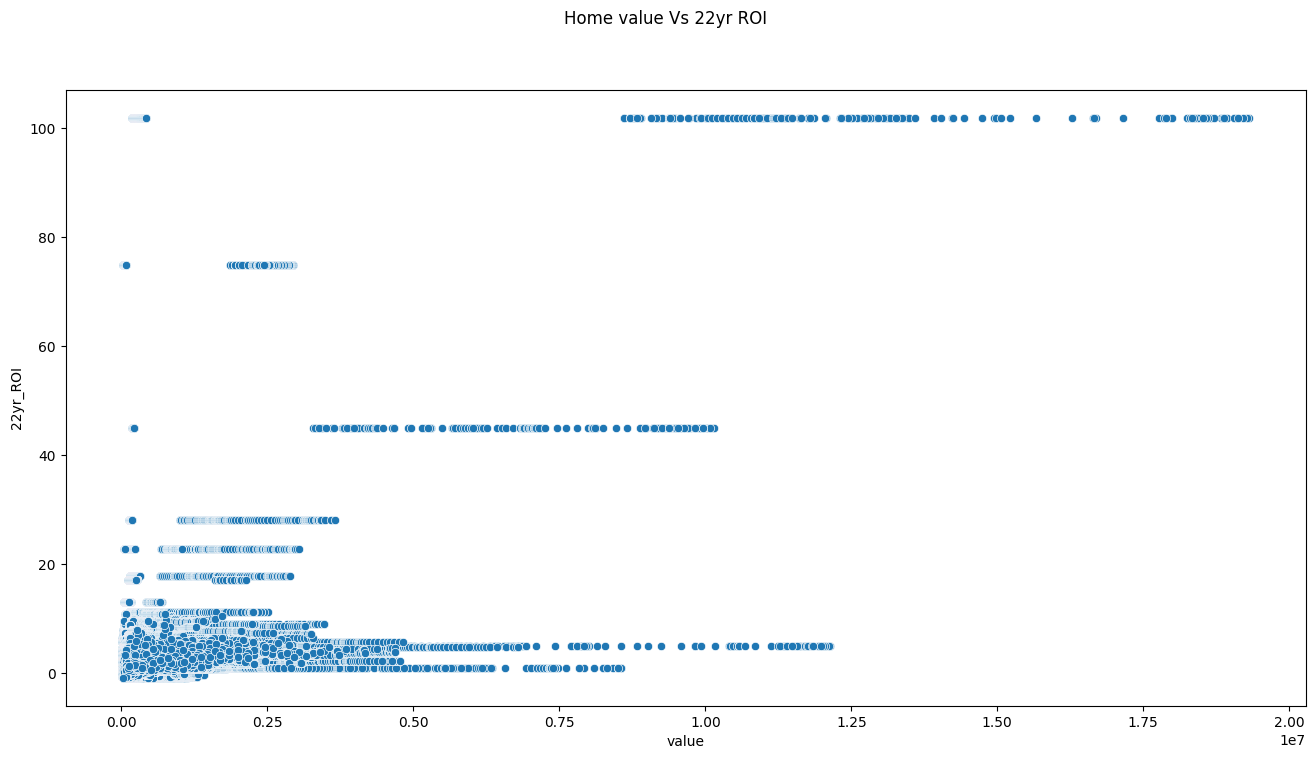

In [78]:
# Visual representation of the correlation
plt.figure(figsize=(16,8))
sns.scatterplot(data = new_data, x = 'value', y = '22yr_ROI')
plt.suptitle("Home value Vs 22yr ROI")

Text(0.5, 0.98, 'Home value VS 5yr ROI')

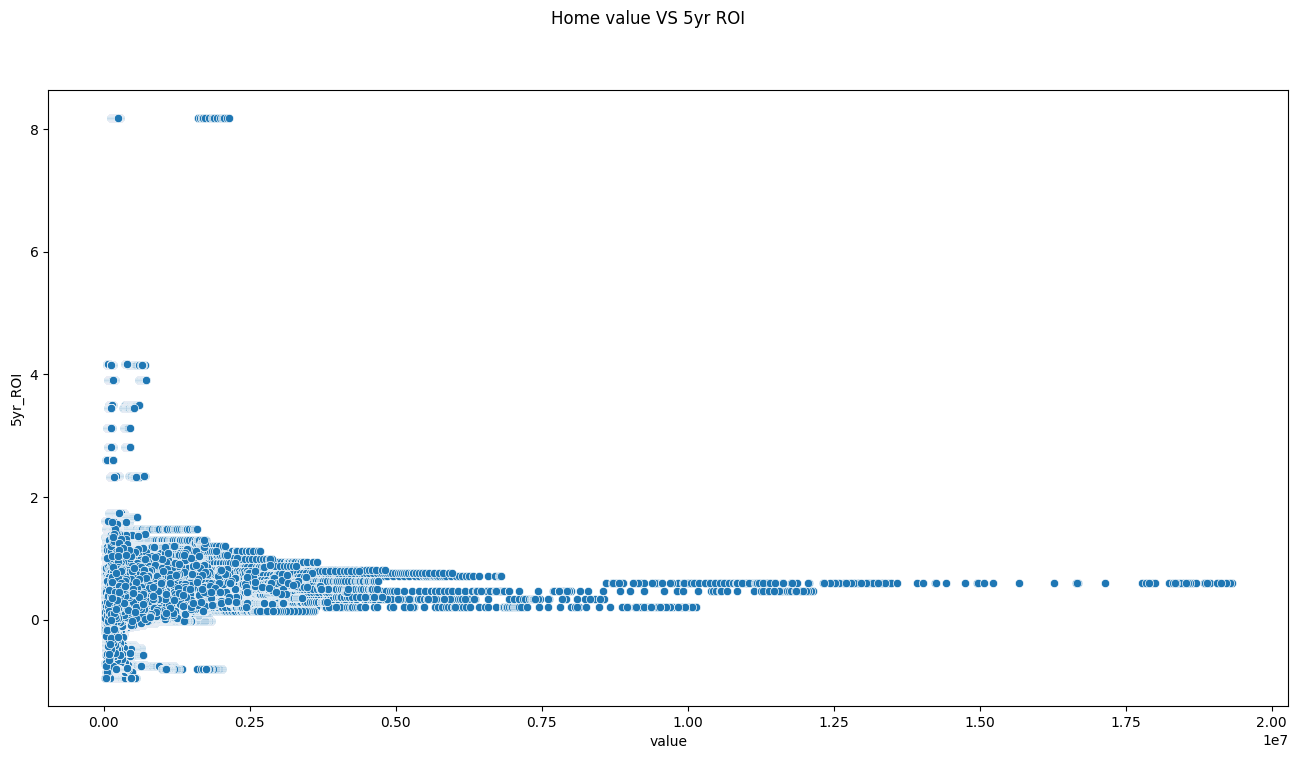

In [79]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = new_data, x = 'value', y = '5yr_ROI')
plt.suptitle("Home value VS 5yr ROI")

Text(0.5, 0.98, 'Home value VS 22yr CV')

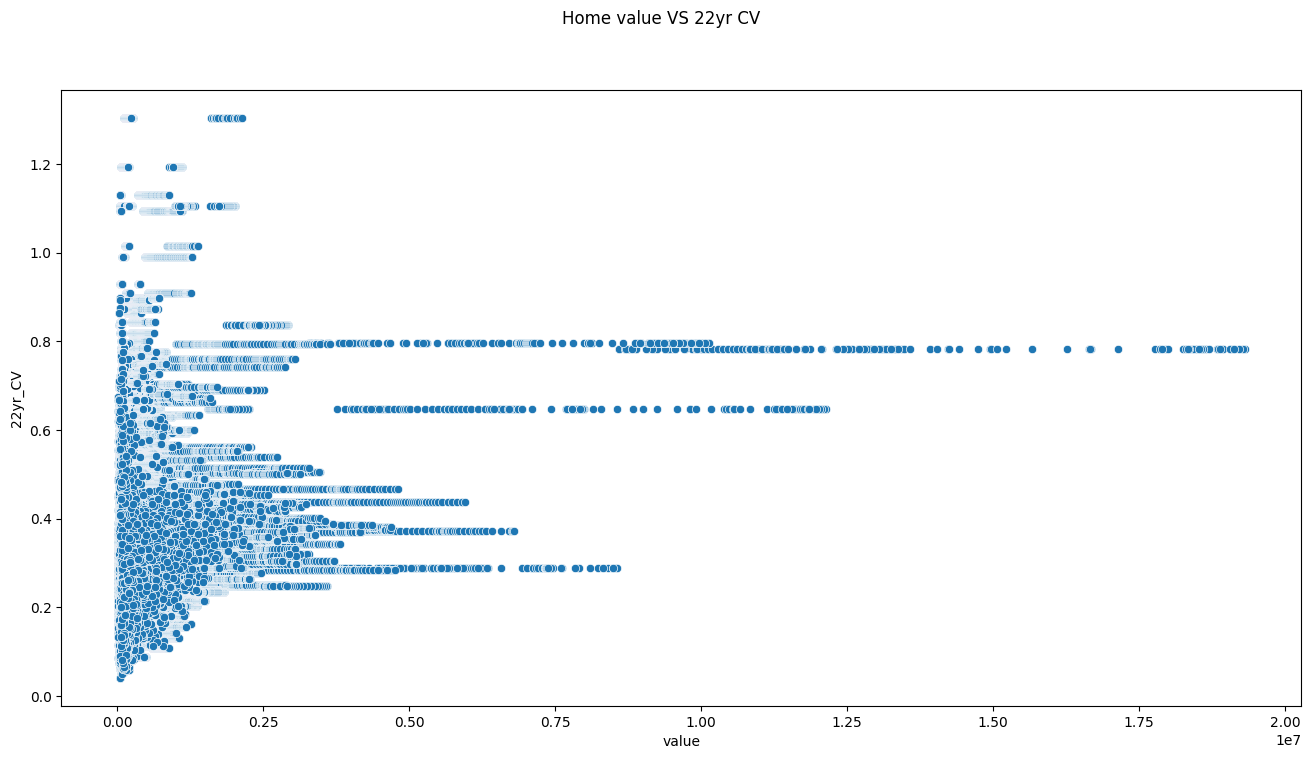

In [80]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = new_data, x = 'value', y = '22yr_CV')
plt.suptitle("Home value VS 22yr CV")

Text(0.5, 0.98, 'Home value Vs 5yr CV')

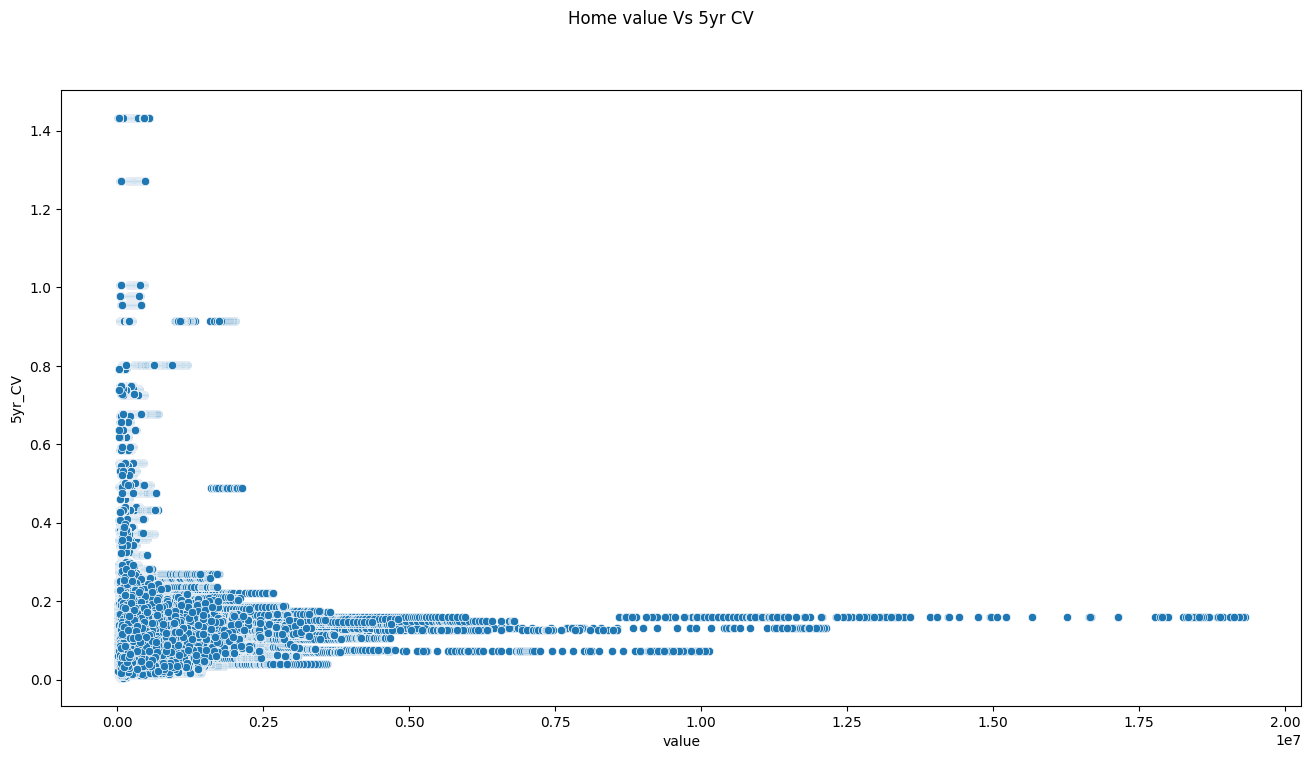

In [81]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = new_data, x = 'value', y = '5yr_CV')
plt.suptitle("Home value Vs 5yr CV")

Text(0.5, 0.98, '22yr CV VS 22yr ROI')

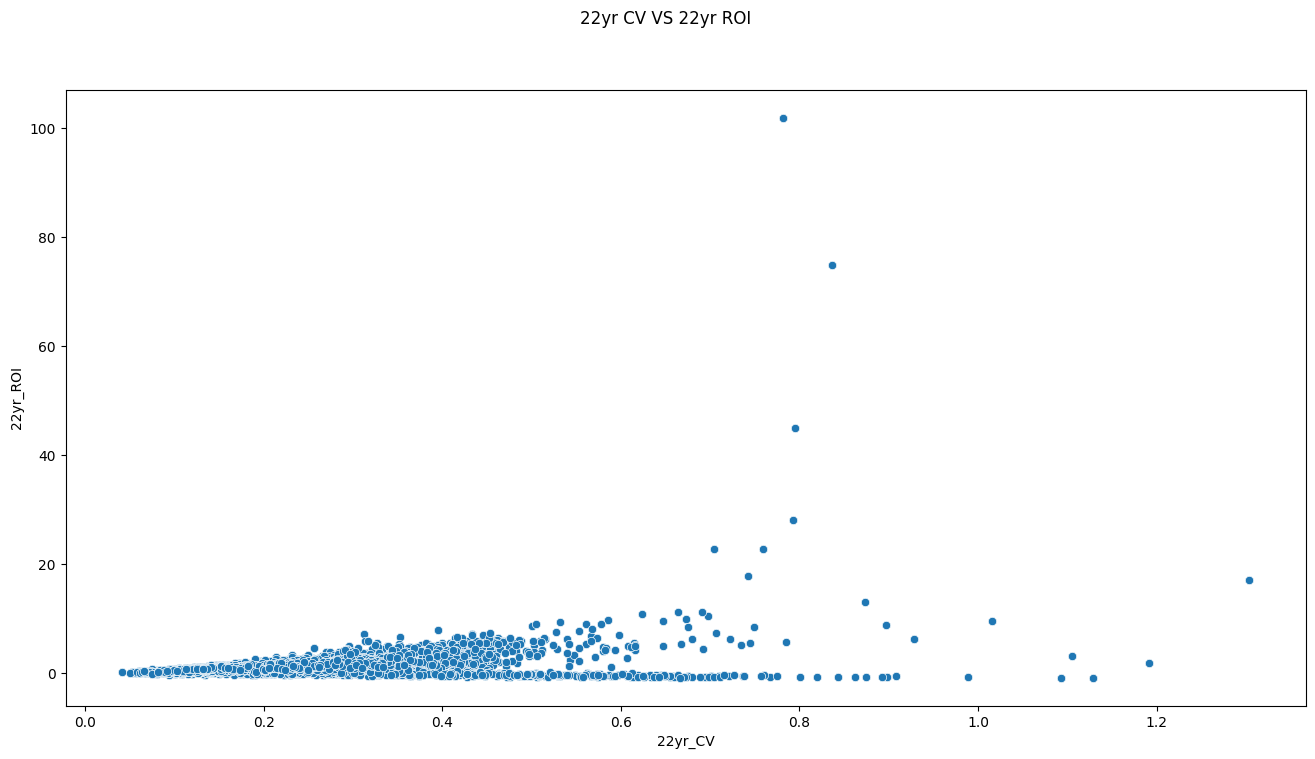

In [82]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = new_data, x = '22yr_CV', y = '22yr_ROI')
plt.suptitle("22yr CV VS 22yr ROI")

Text(0.5, 0.98, '5yr CV VS 5yr ROI')

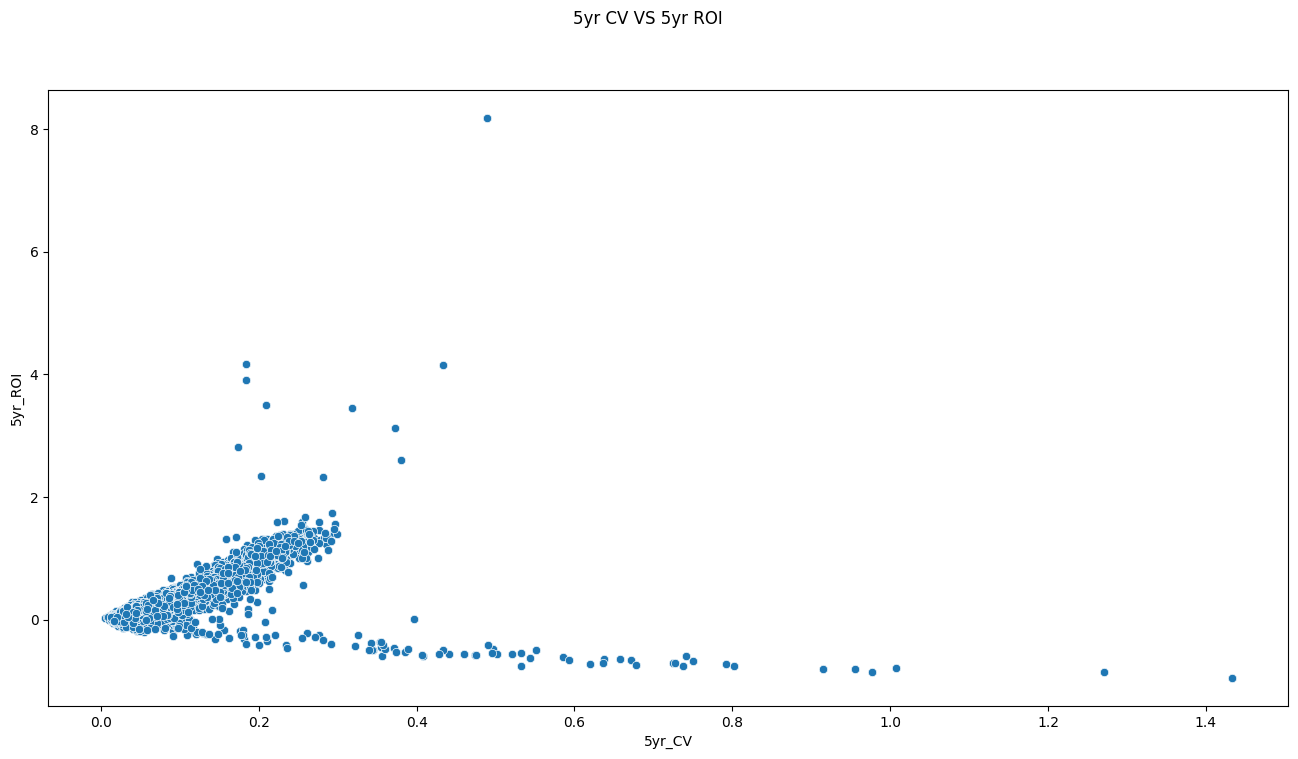

In [83]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = new_data, x = '5yr_CV', y = '5yr_ROI')
plt.suptitle("5yr CV VS 5yr ROI")

Next we look at the relationship between the categorical data and numeric data. This analysis will help us answer some of the very important business objectives and research questions

#### Feature `SizeRank` VS `value`

In [84]:
# Get home values based on SizeRank
urban_housevalue = pd.DataFrame(new_data.groupby("SizeRank")["value"].mean().sort_values(ascending=False).head(5))

Text(0.5, 0, 'SizeRank')

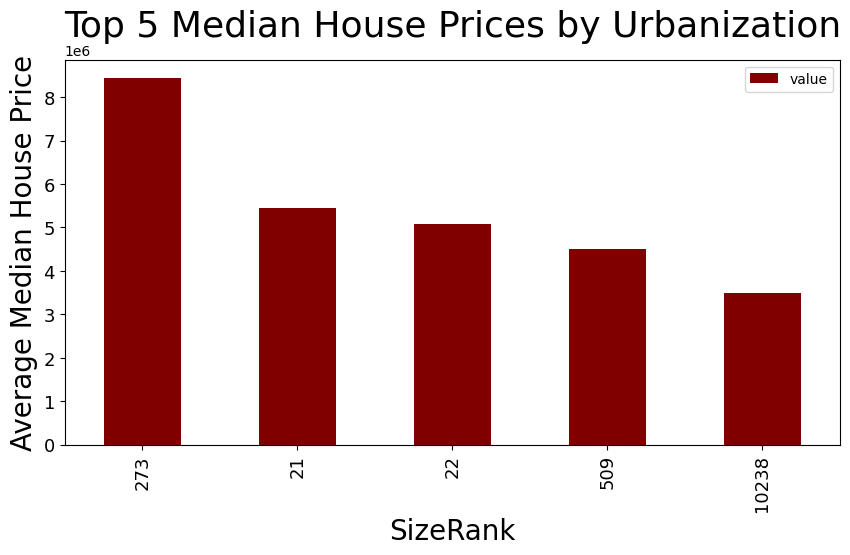

In [85]:
# Visualize the distribution
ax = urban_housevalue.plot(kind='bar', figsize=(10,5), color="maroon", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top 5 Median House Prices by Urbanization", fontsize=26)
ax.set_ylabel("Average Median House Price", fontsize=20);
ax.set_xlabel("SizeRank", fontsize=20)

Size Rank represents urbanization from a rank 1 with 1 being the most urbanized area. From the plot analysis, highly urban areas do fetch high median house prices since sizeRank 273 (New York, New York) shows the highest median house price. Rank 21 and 22 also represent New York. Four out of the top five ranks are from New York state. So urbanization does not affect median house prices.


#### Feature `City` VS `value`

In [86]:
# Get home values based on City
houseprice_topcities = pd.DataFrame(new_data.groupby("City")["value"].mean().sort_values(ascending=False).head(5))

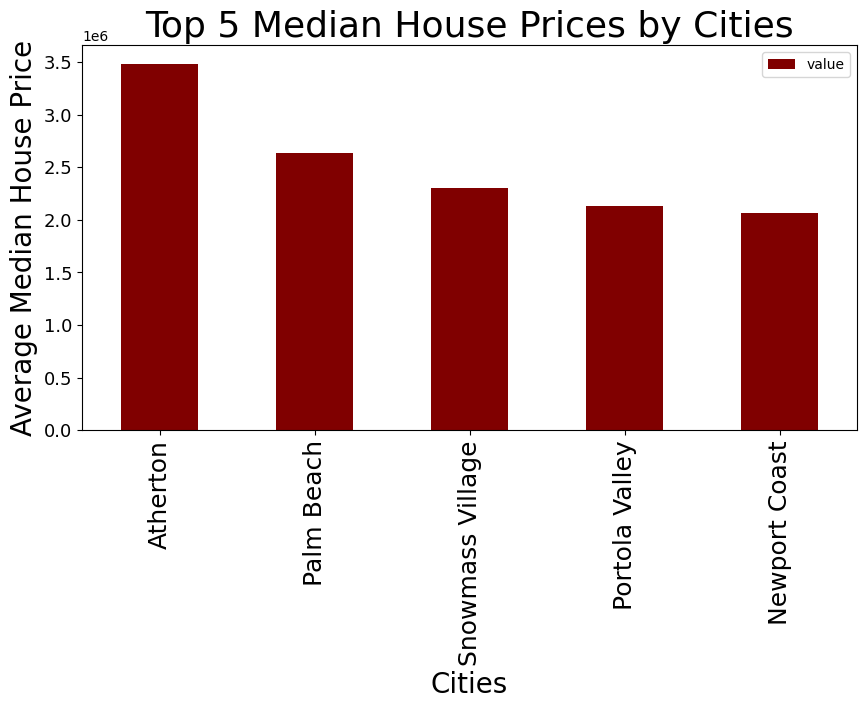

In [87]:
# Visualize the distribution
ax = houseprice_topcities.plot(kind='bar', figsize=(10,5), color="maroon", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top 5 Median House Prices by Cities", fontsize=26)
ax.set_ylabel("Average Median House Price", fontsize=20);
ax.set_xlabel("Cities", fontsize=20)
plt.xticks(fontsize= 18)

plt.show()

The top three cities with the highest median house prices are Atherton (California), Palm Beach(Florida) and Snowmass Village (Colorado). A similar characteristic some the highest home values have based on cities is that they are in coastal areas


#### Feature `Zipcode` Vs `value`

In [88]:
# Get home values based on the zipcode
houseprice_topzipcode = pd.DataFrame(new_data.groupby("Zipcode")["value"].mean().sort_values(ascending=False).head(5))

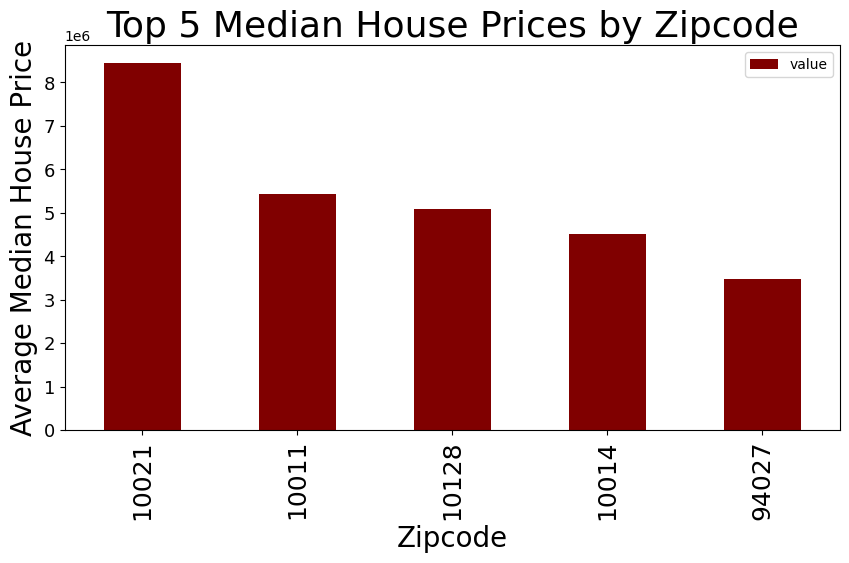

In [89]:
# Visualize the distribution
ax = houseprice_topzipcode.plot(kind='bar', figsize=(10,5), color="maroon", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top 5 Median House Prices by Zipcode", fontsize=26)
ax.set_ylabel("Average Median House Price", fontsize=20);
ax.set_xlabel("Zipcode", fontsize=20)
plt.xticks(fontsize= 18)

plt.show()

The graph show that the zipcodes with the highest home value with the first 4 (10021, 10011, 10128, 10014) belong to New York and the 5th (94027) belonging to California


#### Feature `Zipcode` VS `CV`

In [90]:
# Get the longterm volatility of zipcodes
longterm_CV_zipcode = pd.DataFrame(new_data.groupby("Zipcode")["22yr_CV"].mean().sort_values(ascending=False).head(5))

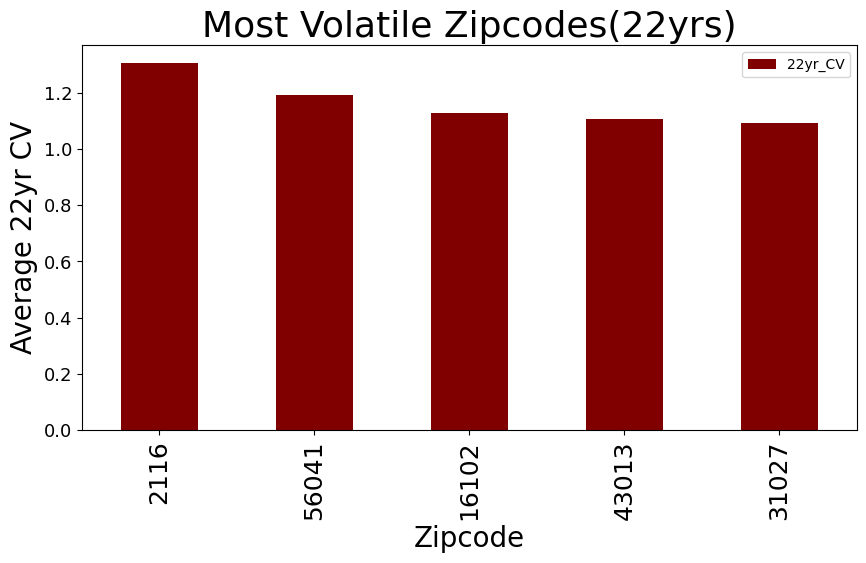

In [91]:
# Visualize the distribution
ax = longterm_CV_zipcode.plot(kind='bar', figsize=(10,5), color="maroon", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Most Volatile Zipcodes(22yrs)", fontsize=26)
ax.set_ylabel("Average 22yr CV", fontsize=20);
ax.set_xlabel("Zipcode", fontsize=20)
plt.xticks(fontsize= 18)

plt.show()

In [92]:
# Get the short term volatility of the zipcodes
shortterm_CV_zipcode = pd.DataFrame(new_data.groupby("Zipcode")["5yr_CV"].mean().sort_values(ascending=False).head(5))

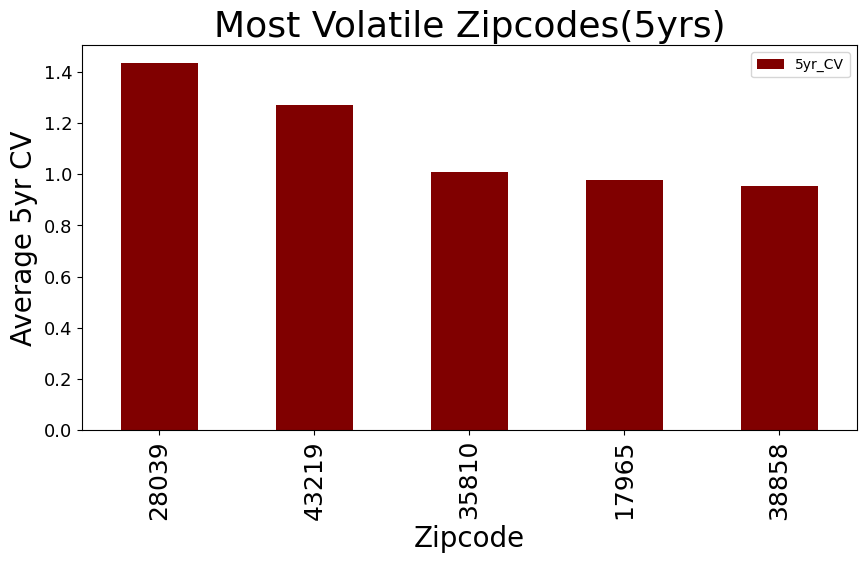

In [93]:
# Visualize the distribution
ax = shortterm_CV_zipcode.plot(kind='bar', figsize=(10,5), color="maroon", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Most Volatile Zipcodes(5yrs)", fontsize=26)
ax.set_ylabel("Average 5yr CV", fontsize=20);
ax.set_xlabel("Zipcode", fontsize=20)
plt.xticks(fontsize= 18)

plt.show()

CV represents the coefficient of variation and how values deviate from the mean. Therefore, a high CV shows the price deviates further from the mean this indicates that there is presence of high price volatility. Areas with high price volatility may present the problem of being predicted effectively and hence can be an issue for investors looking to predict future median house sale prices.Tho a high volatility is discouraging it can also be encouraging since the volatility can lead the home value to increase drastically

The zipcodes with the highest price volatility in 22 years are:

* 56041 New Ulm- Minnesota
* 16102 New Castle-Pennsylavia
* 43103 Ohio-Colombus
* 31027 Dublin-Georgia


#### Feature `Zipcode` VS `ROI`

In [94]:
# Get the long term ROI of the zipcodes
longterm_ROI_zipcode = pd.DataFrame(new_data.groupby("Zipcode")["22yr_ROI"].mean().sort_values(ascending=False).head(5))

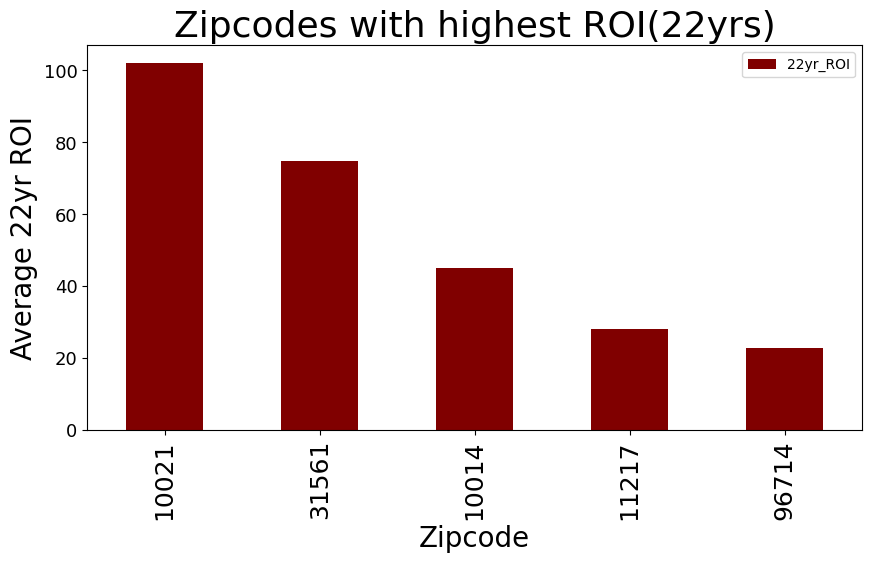

In [95]:
# Visualize the distribution
ax = longterm_ROI_zipcode.plot(kind='bar', figsize=(10,5), color="maroon", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Zipcodes with highest ROI(22yrs)", fontsize=26)
ax.set_ylabel("Average 22yr ROI", fontsize=20);
ax.set_xlabel("Zipcode", fontsize=20)
plt.xticks(fontsize= 18)

plt.show()

In [96]:
# Get the short term ROI of the zipcodes
shortterm_ROI_zipcode = pd.DataFrame(new_data.groupby("Zipcode")["5yr_ROI"].mean().sort_values(ascending=False).head(5))

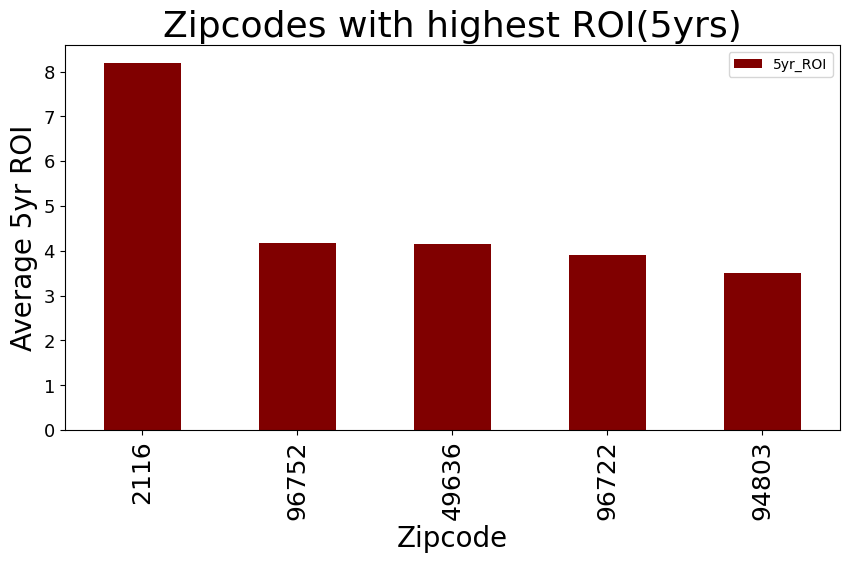

In [97]:
# Visualize the distribution
ax = shortterm_ROI_zipcode.plot(kind='bar', figsize=(10,5), color="maroon", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Zipcodes with highest ROI(5yrs)", fontsize=26)
ax.set_ylabel("Average 5yr ROI", fontsize=20);
ax.set_xlabel("Zipcode", fontsize=20)
plt.xticks(fontsize= 18)

plt.show()

The zipcodes with the highest ROI in 22 years are:
* Upper East Side- New York(10021)
* Sea Island- Georgia State (31561)
* Manhattan -New York(10014)
* Brooklyn New York(11217)
* Hanalei- Hawaii (96714).

To assit in identifying the zipcodes [Melissa Lookups]("https://www.melissa.com/v2/lookups/mapzip/zipcode/?zipcode=94027") is very helpful.Once the zipcode is given the state, city and many other descriptive features are given

## 4.3 Time Series EDA

This analysis will answer the question: What is the trend of median houseprices over the years?\
To do this we look at the distribution of the time series

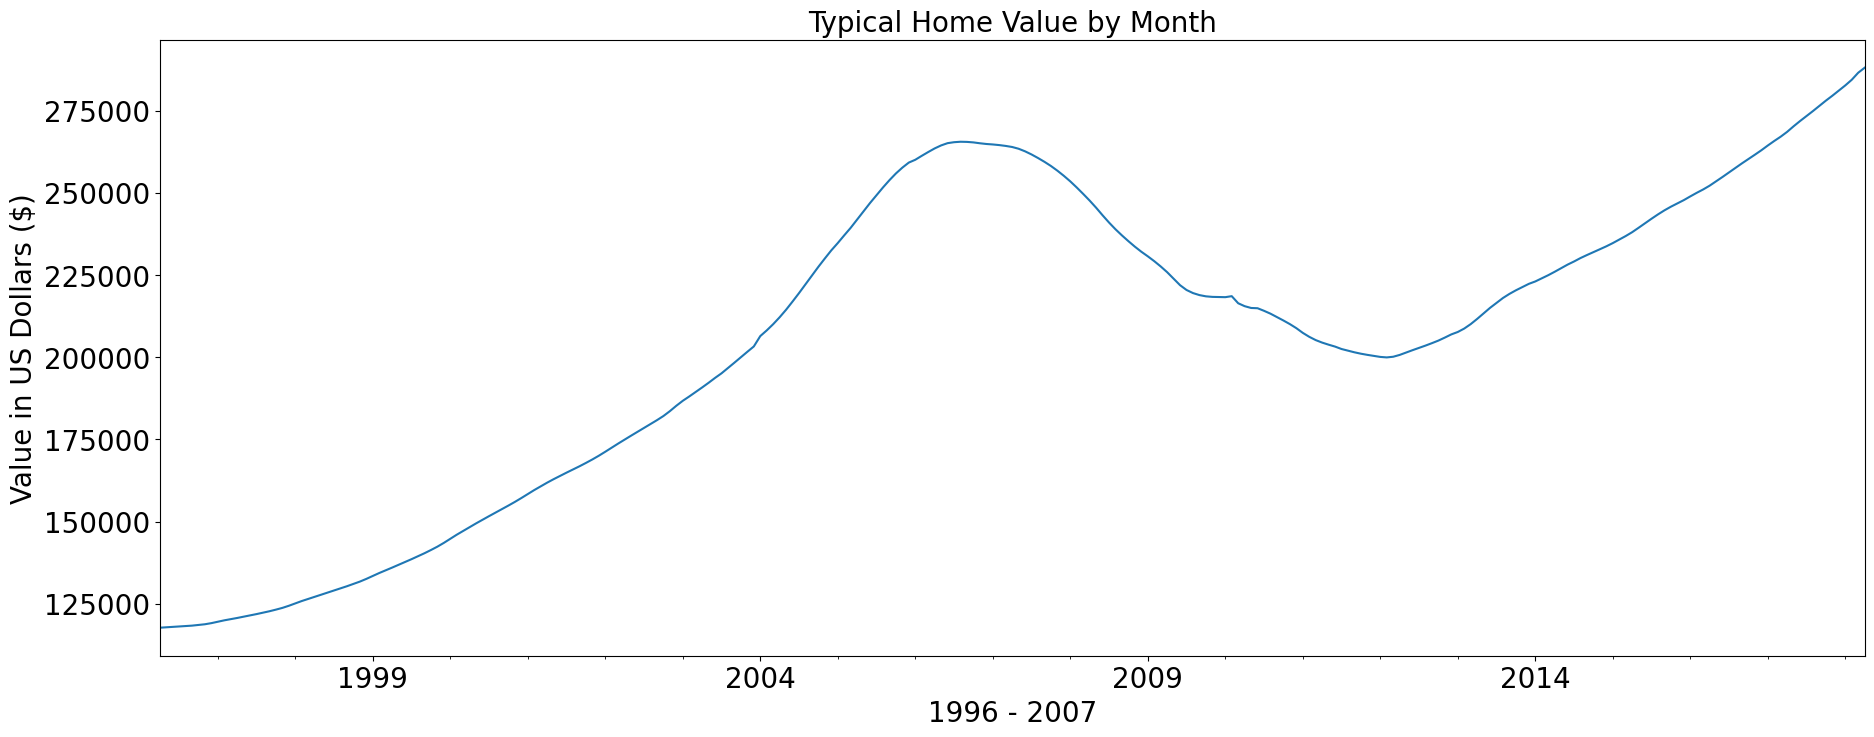

In [98]:
# Sample your data into months
new_data_on = new_data.select_dtypes(include=['number'])
time_series_monthly_value = new_data_on.resample('MS').mean()['value']
# Draw a line plot using the new data
time_series_monthly_value.plot(figsize = (22,8))

plt.title('Typical Home Value by Month',fontsize = 20)
plt.ylabel('Value in US Dollars ($)',fontsize = 20)
plt.xlabel ('1996 - 2007',fontsize = 20)

plt.yticks(fontsize = 20)
plt.xticks (fontsize = 20)

plt.show()

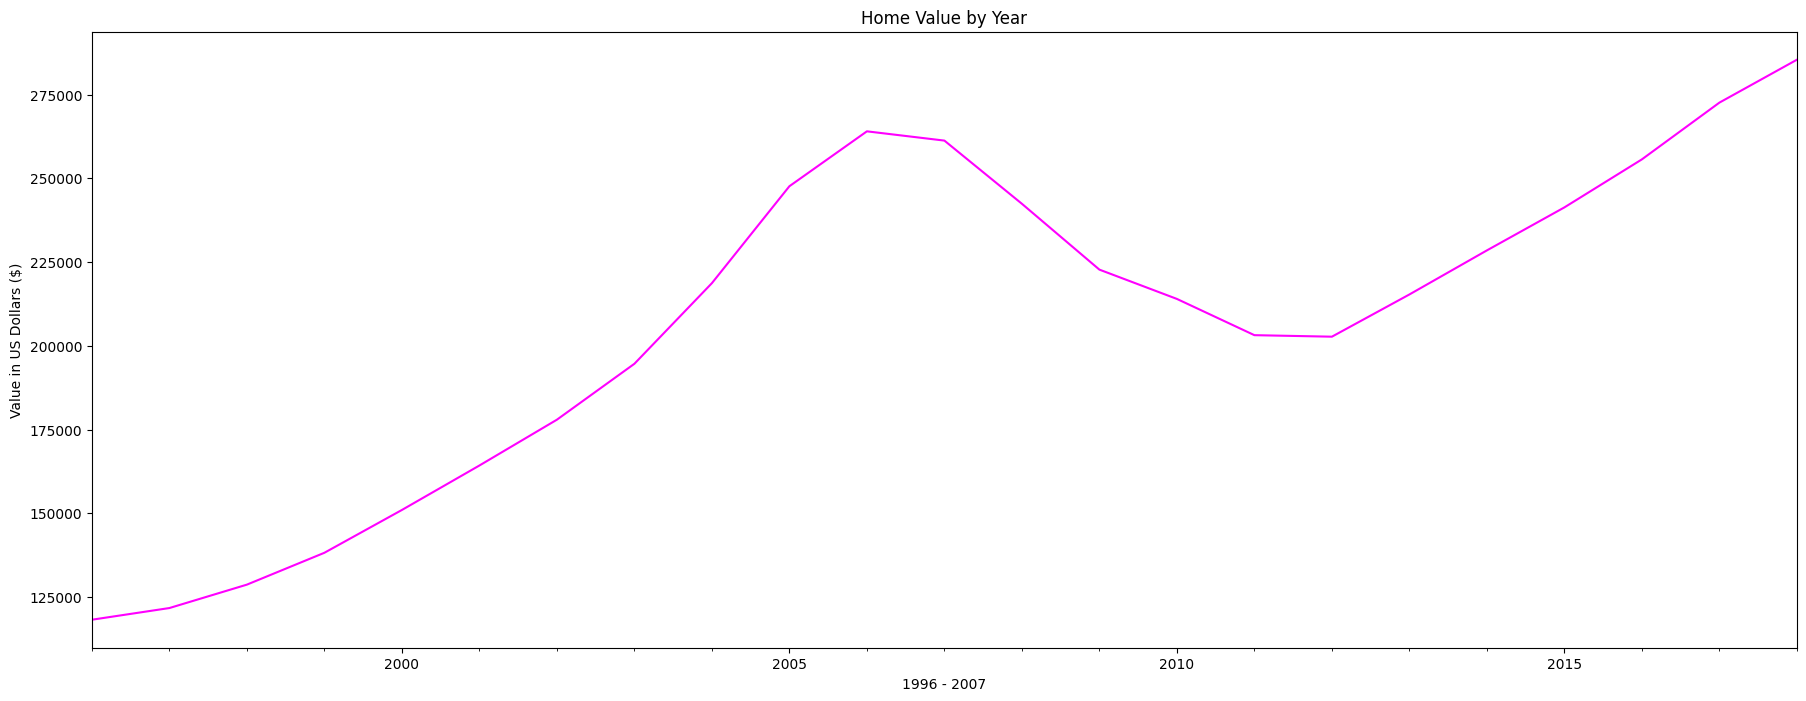

In [99]:
# Annual 
new_data_on = new_data.select_dtypes(include=['number'])
yearly_value =  new_data_on['value'].resample(rule='A').mean()
yearly_value.plot.line(figsize = (22,8), color='magenta',)

plt.title('Home Value by Year')
plt.ylabel('Value in US Dollars ($)')
plt.xlabel ('1996 - 2007')


plt.show()

The data is seen to have a general upward trend over time.However due to the great recession which began in 2007 that led to the collapse of the American real estate market.This is depicted in the downward trend from 2007 to 2012 when the housing market began stabilizing. In 2013 the real estate boom happened leading to the increase in home values once again hence the upward trend

<Axes: xlabel='value', ylabel='Count'>

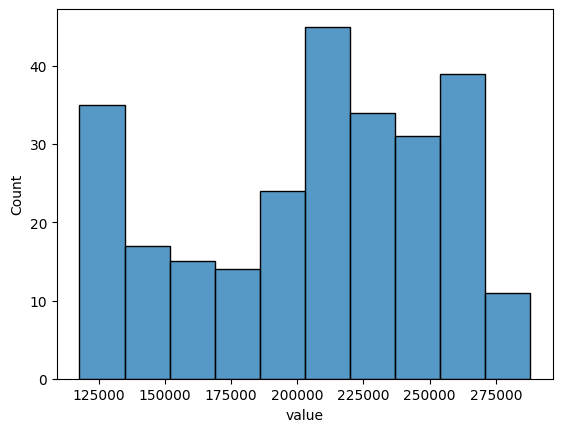

In [100]:
# plot a histogram for monthly distribution
sns.histplot(time_series_monthly_value, bins=10)

<Axes: xlabel='value', ylabel='Count'>

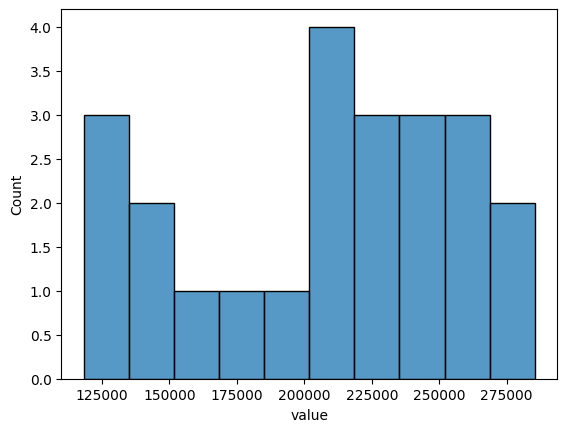

In [101]:
# Plot a histogram for yearly distribution
sns.histplot(yearly_value, bins=10)

<Axes: xlabel='value', ylabel='Density'>

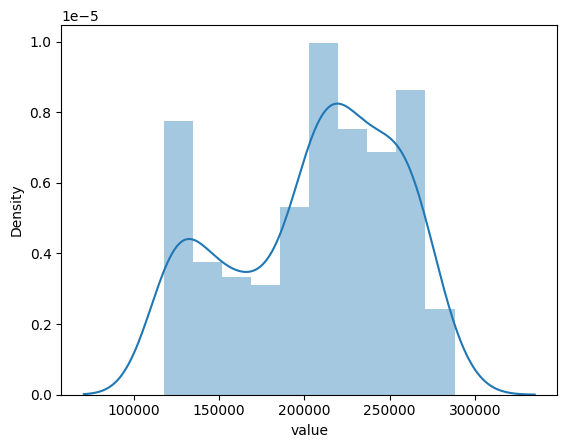

In [102]:
# Plot a Kde
plt.plot(figsize= (12,6))
sns.distplot(time_series_monthly_value, bins=10)

<Axes: xlabel='value', ylabel='Density'>

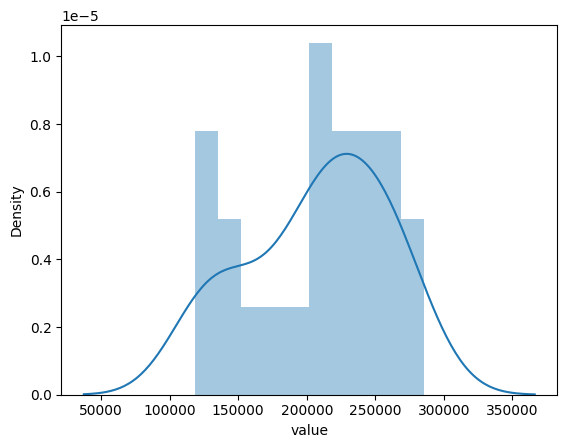

In [103]:
# Plot a Kde
plt.plot(figsize= (12,6))
sns.distplot(yearly_value, bins=10)

It can be seen that both the monthly and yearly resampled data are not normally distributed. 

In [ ]:
# Saving the data
new_df = new_data.to_csv("new_df.csv")